# Entrega 1

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_excel('ClientesEcoCompany.xlsx','dados')


In [ ]:
print(dados)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CodCompra          50 non-null     int64
 1   CodCliente         50 non-null     int64
 2   Meses de Contrato  50 non-null     int64
 3   Valor Total        50 non-null     int64
 4   Serviço            50 non-null     int64
dtypes: int64(5)
memory usage: 2.1 KB


# Entrega 2

Treino e execução do RandomForest

In [ ]:
Caracteristicas = dados.iloc[:,0:4].values
Previsor = dados.iloc[:,4:5].values

In [ ]:
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(
    Caracteristicas,
    Previsor,
    test_size=0.35,
    random_state=10
)

print(len(dados))
print(len(x_treinamento))
print(len(x_teste))

50
32
18


In [ ]:
from sklearn.ensemble import RandomForestClassifier

Algoritmo_floresta_aleatoria = RandomForestClassifier(n_estimators=300)
Algoritmo_floresta_aleatoria.fit(x_treinamento, y_treinamento.ravel())

RandomForestClassifier(n_estimators=300)

Matriz Confusão

[[6 0 0]
 [1 2 1]
 [0 3 5]]


<Axes: >

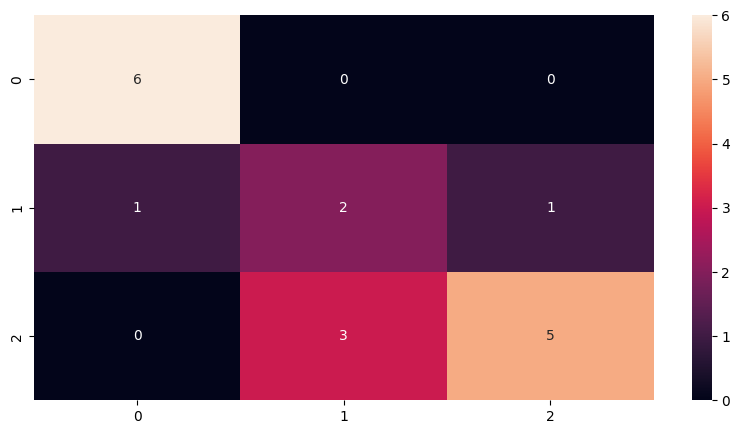

In [ ]:
Previsoes= Algoritmo_floresta_aleatoria.predict(x_teste)

from sklearn.metrics import confusion_matrix
Matriz_Confusao = confusion_matrix(y_teste, Previsoes)
print(Matriz_Confusao)

plt.figure( figsize=(10,5))
sns.heatmap(Matriz_Confusao, annot=True)

Avaliação de performance

In [49]:
from sklearn.metrics import classification_report

report = classification_report (y_teste, Previsoes)
print(report)



              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       0.40      0.50      0.44         4
           3       0.83      0.62      0.71         8

    accuracy                           0.72        18
   macro avg       0.70      0.71      0.69        18
weighted avg       0.74      0.72      0.72        18



# Entrega 3

Hiperparâmetros e validação cruzada utilizando GridSearch

In [55]:

from sklearn.model_selection import GridSearchCV

# Otimizar hiperparâmetros
parametros = {'bootstrap':[True],
              'n_estimators': [100, 300],
              'max_depth': [ 6, 10],
              'min_samples_leaf':[3,5],
              'min_samples_split':[4,6],
              }
forest_grid_search = GridSearchCV(Algoritmo_floresta_aleatoria, parametros, cv=5,
                                  scoring="accuracy",return_train_score=True,
                                  verbose=True,n_jobs=1)

forest_grid_search.fit(x_treinamento, y_treinamento.ravel())

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=300), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [6, 10],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [4, 6],
                         'n_estimators': [100, 300]},
             return_train_score=True, scoring='accuracy', verbose=True)

In [56]:
forest_grid_search.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 100}